# Desafio 2: bora praticar?

O time de ML chegou com algumas demandas de última hora para resolvermos nesse momento da análise exploratória. Essas demandas são:

1) Calcular a média de quartos por apartamento;

2) Conferir quantos bairros únicos existem na nossa base de dados;

3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;

4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

<br>

Caso queira, deixo disponibilizado um [notebook para resolver os desafios](https://cdn3.gnarususercontent.com.br/2925-introducao-pandas/desafios.ipynb). Você pode baixá-lo e fazer upload no Google Drive ou direto no Google Colab para realizar os desafios dessa e das outras aulas. Como vamos utilizar a mesma base de dados do nosso projeto, no notebook de resolução dos desafios, eu fiz novamente a importação da nossa base de dados e apliquei as alterações que já realizamos nela até aqui.

Se precisar de ajuda, na seção "Opinião do Instrutor" você pode encontrar algumas formas de resolver os desafios propostos acima.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url ='https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
pd.read_csv(url)

pd.read_csv(url, sep=';') # "sep=';' = Separa por ; os itens da tabela.

dados = pd.read_csv(url, sep=';') # "sep=';' = Separa por ; os itens da tabela.
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [4]:
dados.Tipo.unique() # Mostra os tipos de imóveis.
imoveis_comerciais = ['Conjunto Comercial/Sala',
                      'Prédio Inteiro', 'Loja/Salão',
                      'Galpão/Depósito/Armazém',
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria'] # Cria uma váriavel com os tipos de imóveis comerciais.

In [6]:
dados.query('@imoveis_comerciais not in Tipo') # Cria uma tabela com os tipos de imóveis não comerciais.

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [8]:
df_imoveis_residenciais = dados.query('@imoveis_comerciais not in Tipo') # Cria uma tabela com os tipos de imóveis não comerciais e atribui ele a váriavel.
df_imoveis_residenciais.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [10]:
df_imoveis_residenciais.query('Tipo == "Apartamento"') # Mostra apenas os imóveis do tipo apartamento.

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [12]:
df_apartamentos = df_imoveis_residenciais.query('Tipo == "Apartamento"') # Mostra apenas os imóveis do tipo apartamento e atribui ele a váriavel.
                                                                         # df_apartamentos.
df_apartamentos.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [14]:
# Após estruturar os dados que serão necessarios, vamos resolver a atividade:

# 1)
df_apartamentos.Quartos.mean() # Mostra a média de quartos por apartamento.

2.481568707761622

In [23]:
# 2)
df_imoveis_residenciais.Bairro.unique() # Mostra os bairros únicos da tabela.


array(['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Vista Alegre', 'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Botafogo', 'Taquara',
       'Freguesia (Jacarepaguá)', 'Tijuca', 'Olaria', 'Leblon', 'Ipanema',
       'Campo Grande', 'Recreio dos Bandeirantes', 'Jardim Oceânico',
       'Humaitá', 'Península', 'Méier', 'Vargem Pequena', 'Maracanã',
       'Jacarepaguá', 'São Conrado', 'Vila Valqueire', 'Gávea',
       'Cosme Velho', 'Bonsucesso', 'Todos os Santos', 'Laranjeiras',
       'Itanhangá', 'Flamengo', 'Praça Seca', 'Piedade', 'Lagoa',
       'Catete', 'Jardim Carioca', 'Benfica', 'Glória', 'Vila Isabel',
       'Rocha Miranda', 'Engenho Novo', 'Engenho de Dentro',
       'Cidade Nova', 'Pilares', 'Arpoador', 'Tomás Coelho', 'Água Santa',
       'São Cristóvão', 'Ilha do Governador', 'Jardim Sulacap',
       'Oswaldo Cruz', 'Vila da Penha', 'Anil', 'Vargem Grande', 'Tanque',
       'Vaz Lobo', 'Madureira', 'São Francisco 

In [53]:
# 2.1)
df_bairro_unicos = len(df_imoveis_residenciais.Bairro.unique()) # Mostra o número de bairros únicos da tabela.
df_bairro_unicos

TypeError: Series.unique() takes 1 positional argument but 2 were given

In [29]:
# 3)
df_imoveis_residenciais.groupby('Bairro')['Valor'].mean().sort_values(ascending=False) # Mostra os bairros com as médias de valores de aluguel mais elevadas.

,Valor
Bairro,
Joá,16773.478261
Cidade Jardim,12000.000000
Arpoador,10896.062500
Paquetá,10550.000000
Ipanema,9196.116863
...,...
Honório Gurgel,655.555556
Senador Camará,600.000000
Paciência,580.000000


In [54]:
# 4)
df_bairros_unicos = df_imoveis_residenciais.groupby('Bairro')['Valor'].mean().sort_values(ascending=False)
df_bairros_unicos.head()

,Valor
Bairro,
Joá,16773.478261
Cidade Jardim,12000.000000
Arpoador,10896.062500
Paquetá,10550.000000
Ipanema,9196.116863


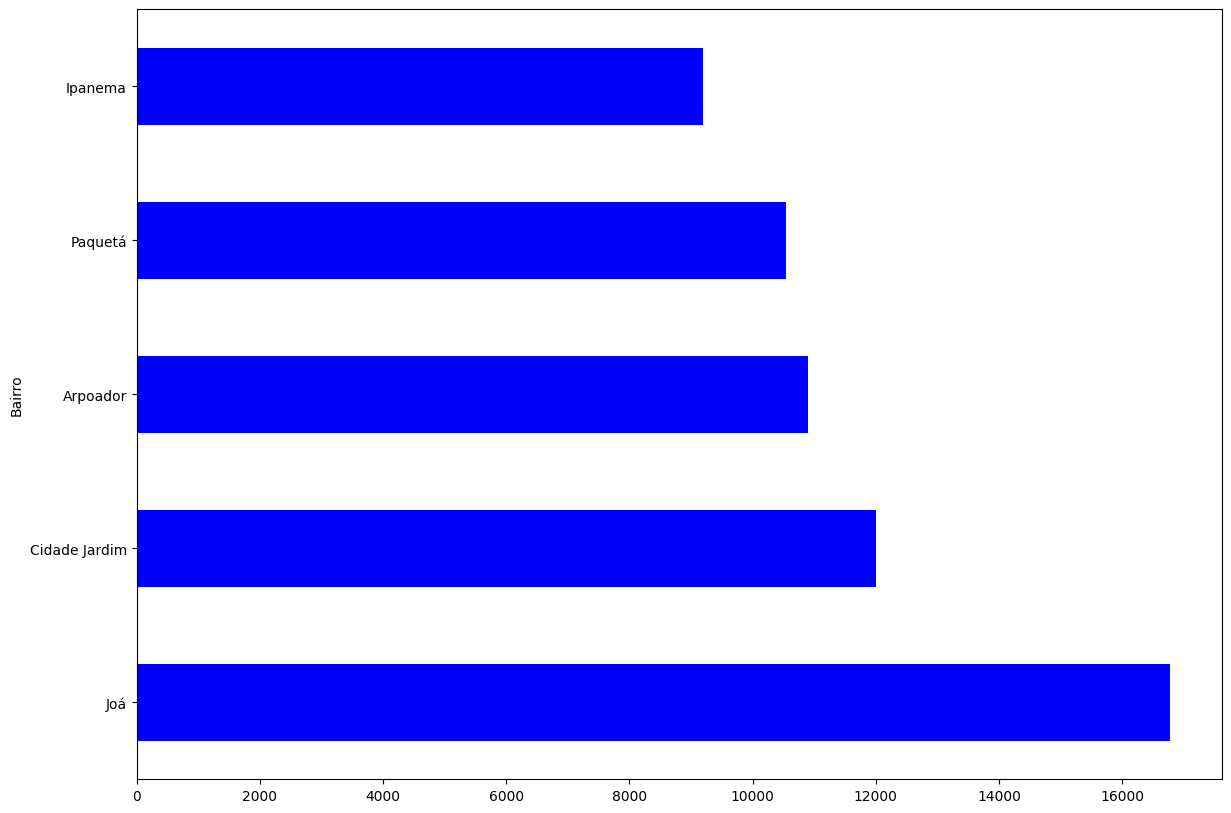

In [56]:
# 4.1)
df_bairros_unicos.head(5).plot(kind='barh', figsize=(14,10), color='blue'); # Mostra o gráfico de barras horizontais dos 5 bairros com as médias de valores de aluguel mais elevadas.
